# Introduction

We will use deep feedforward networks to classify images 

# Working With Image Data

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits_data = load_digits()

In [3]:
digits_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
data = pd.DataFrame(digits_data['data']) # features in dataframe
labels = pd.Series(digits_data['target']) # labels in series
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


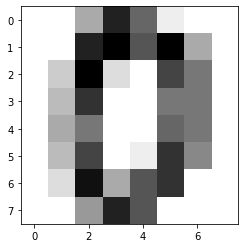

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

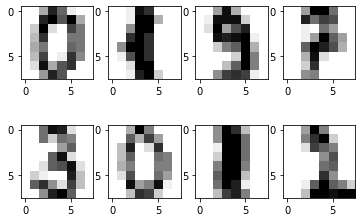

In [6]:
figure, axis = plt.subplots(2,4)
# First column
axis[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axis[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axis[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axis[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axis[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axis[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axis[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axis[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

# K-Nearest Neighbors Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Create training model using training features and labels with defined nearest neighbors
def train(nneighbors,train_features,train_labels):
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

# Create test model to generate predictions
def test(model,test_features,test_labels):
    predictions = model.predict(test_features)
    model_predict_df = pd.DataFrame()
    model_predict_df['correct_label'] = test_labels # true values
    model_predict_df['predicted_label'] = predictions
    # Compute overal accuracy where the predictions match the true value
    accuracy = sum(model_predict_df['predicted_label'] == model_predict_df['correct_label']) / len(model_predict_df)
    return accuracy

def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies

knn_one_accuracy = cross_validate(1)
np.mean(knn_one_accuracy)

0.9677233358079684

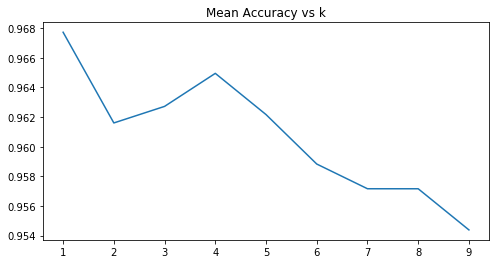

In [8]:
def overall_accuracy(k_values):
    k_mean_accuracies = []
    for k in k_values:
        k_accuracy = cross_validate(k)
        k_mean_accuracy = np.mean(k_accuracy)
        k_mean_accuracies.append(k_mean_accuracy)
    return k_mean_accuracies

k_values = list(range(1,10))
k_mean_accuracies = overall_accuracy(k_values)

plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs k')
plt.plot(k_values, k_mean_accuracies)

# Neural Network with One Hidden Layer

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

# Create test model to generate predictions
def test(model,test_features,test_labels):
    predictions = model.predict(test_features)
    model_predict_df = pd.DataFrame()
    model_predict_df['correct_label'] = test_labels # true values
    model_predict_df['predicted_label'] = predictions
    # Compute overal accuracy where the predictions match the true value
    accuracy = sum(model_predict_df['predicted_label'] == model_predict_df['correct_label']) / len(model_predict_df)
    return accuracy

def cross_validate(neuron_arch):
    nn_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neuron_arch, train_features, train_labels)
        nn_accuracy = test(model, test_features, test_labels)
        nn_accuracies.append(nn_accuracy)
    return nn_accuracies

C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

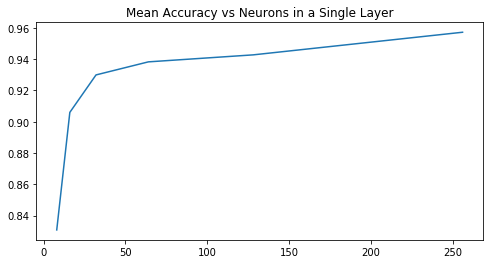

In [10]:
nn_one_neurons = [(8,),(16,),(32,),(64,),(128,),(256,)]

def overall_accuracy_nn(nn_values):
    nn_one_accuracies = []
    for n in nn_values:
        nn_accuracy = cross_validate(n)
        nn_mean_accuracy = np.mean(nn_accuracy)
        nn_one_accuracies.append(nn_mean_accuracy)
    return nn_one_accuracies

nn_one_mean_accuracies = overall_accuracy_nn(nn_one_neurons)
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs Neurons in a Single Layer')
x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_mean_accuracies)

Increasing the number of neurons in a single hidden layer neural network increased the accuracy from 86% to about 95%.  However, the K-Nearest Neighbors model also had a mean accuracy of 96% so there doesn't seem to be a beneift to using a single hidden layer neural network

# Neural Network with Two Hidden Layers

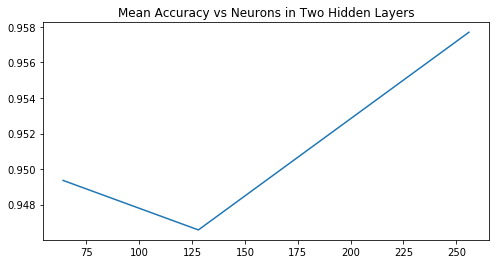

In [14]:
nn_two_neurons = [(64,64),(128,128),(256,256)]

nn_two_mean_accuracies = overall_accuracy_nn(nn_two_neurons)
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs Neurons in Two Hidden Layers')
x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_mean_accuracies)

In [15]:
nn_two_mean_accuracies

[0.9493603068547388, 0.9465738678544914, 0.9577023014105419]

Using two hidden layers improved accuracy to 95%.  While overfitting is a concern using a four fold cross validation provide reassurance that the model is generalizing properly

# Neural Network with Three Hidden Layers

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

# Create test model to generate predictions
def test(model,test_features,test_labels):
    predictions = model.predict(test_features)
    model_predict_df = pd.DataFrame()
    model_predict_df['correct_label'] = test_labels # true values
    model_predict_df['predicted_label'] = predictions
    # Compute overal accuracy where the predictions match the true value
    accuracy = sum(model_predict_df['predicted_label'] == model_predict_df['correct_label']) / len(model_predict_df)
    return accuracy

def cross_validate_six(neuron_arch):
    nn_accuracies = []
    kf = KFold(n_splits = 6, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neuron_arch, train_features, train_labels)
        nn_accuracy = test(model, test_features, test_labels)
        nn_accuracies.append(nn_accuracy)
    return nn_accuracies

def overall_accuracy_nn_six(nn_values):
    nn_mean_accuracies = []
    for n in nn_values:
        nn_accuracy = cross_validate_six(n)
        nn_mean_accuracy = np.mean(nn_accuracy)
        nn_mean_accuracies.append(nn_mean_accuracy)
    return nn_mean_accuracies

C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mobin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

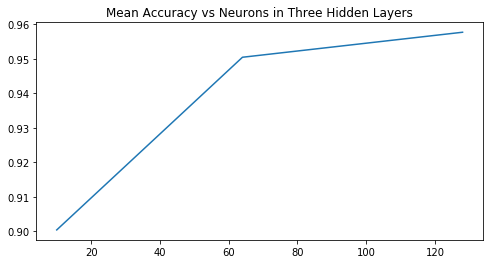

In [17]:
nn_three_neurons = [(10,10,10),(64,64,64),(128,128,128)]

nn_three_mean_accuracies = overall_accuracy_nn_six(nn_three_neurons)
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs Neurons in Three Hidden Layers')
x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_mean_accuracies)

In [18]:
nn_three_mean_accuracies

[0.9003920475659607, 0.9504663693794129, 0.957718320327016]

Using three hidden layers improved the model to 96% even with 6-fold cross validation which is in line with what is in literature.  We can add more layers and more neurons to improve the network performance